In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
%matplotlib inline
tf.__version__

'2.0.0-beta1'

In [15]:
data = pd.read_excel('./dataset/Tweets.xlsx')

In [16]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,570306000000000000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,NaN,NaN,NaN
1,570301000000000000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN
2,570301000000000000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,NaN,NaN,NaN
3,570301000000000000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN
4,570301000000000000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN


In [17]:
data = data[['airline_sentiment', 'text']]

In [20]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [21]:
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [22]:
data.airline_sentiment.value_counts()

negative    9169
neutral     3082
positive    2354
Name: airline_sentiment, dtype: int64

In [24]:
data_p = data[data.airline_sentiment == 'positive']
data_n = data[data.airline_sentiment == 'negative']
data_n = data_n.iloc[:len(data_p)]
len(data_n), len(data_p)

In [30]:
data = pd.concat([data_n, data_p])

In [31]:
data.head()

,airline_sentiment,text
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
15,negative,@VirginAmerica SFO-PDX schedule is still MIA.
17,negative,@VirginAmerica I flew from NYC to SFO last we...


In [32]:
data = data.sample(len(data))

In [33]:
data.head()

,airline_sentiment,text
4398,positive,@SouthwestAir Thx for your quick response and ...
2187,negative,@united what exactly do you hang on this hook?...
957,negative,@united i need it there before she lands so sh...
2288,negative,@united seriously? 2-4 hrs to get bags from IA...
6252,positive,@SouthwestAir @love_dragonss LAUREN IM SCREAMING


In [36]:
data['review'] = (data.airline_sentiment == 'positive').astype('int')

In [37]:
data.head()

,airline_sentiment,text,review
4398,positive,@SouthwestAir Thx for your quick response and ...,1
2187,negative,@united what exactly do you hang on this hook?...,0
957,negative,@united i need it there before she lands so sh...,0
2288,negative,@united seriously? 2-4 hrs to get bags from IA...,0
6252,positive,@SouthwestAir @love_dragonss LAUREN IM SCREAMING,1


In [39]:
del data['airline_sentiment']

In [40]:
data.head()

,text,review
4398,@SouthwestAir Thx for your quick response and ...,1
2187,@united what exactly do you hang on this hook?...,0
957,@united i need it there before she lands so sh...,0
2288,@united seriously? 2-4 hrs to get bags from IA...,0
6252,@SouthwestAir @love_dragonss LAUREN IM SCREAMING,1


tf.keras.layers.Embedding()  # 把文本向量化

In [42]:
token = re.compile('[A-Za-z]+|[!?,.()！？，。（）]')

In [43]:
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text

In [45]:
data['text'] = data.text.apply(reg_text)

In [46]:
word_set = set()
for t in data.text:
    [word_set.add(word) for word in t]

In [54]:
word_list = list(word_set)
word_index = dict((word, word_list.index(word) + 1) for word in word_list)

In [57]:
data_seq = data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [65]:
max_len = max(len(x) for x in data_seq)
max_word = len(word_set) + 1

In [67]:
data_seq = tf.keras.preprocessing.sequence.pad_sequences(data_seq.values, maxlen=max_len)

In [69]:
data_seq.shape

(4708, 365)

In [70]:
data.review.values

array([1, 0, 0, ..., 1, 1, 0])

In [71]:
model = tf.keras.Sequential()

Embeding: 把文本映射为一个密集向量

In [72]:
model.add(tf.keras.layers.Embedding(max_word, 50, input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 365, 50)           356500    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 386,005
Trainable params: 386,005
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['acc']
)

In [75]:
model.fit(data_seq, data.review.values, epochs=10, batch_size=128, validation_split=0.2)

W0721 19:40:38.230252 18048 deprecation.py:323] From D:\Python\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3766 samples, validate on 942 samples
Epoch 1/10
3766/3766 [==============================] - 4s 976us/sample - loss: 0.6373 - acc: 0.6075 - val_loss: 0.5469 - val_acc: 0.7219
Epoch 2/10
3766/3766 [==============================] - 1s 256us/sample - loss: 0.4210 - acc: 0.8176 - val_loss: 0.2785 - val_acc: 0.8758
Epoch 3/10
3766/3766 [==============================] - 1s 265us/sample - loss: 0.3076 - acc: 0.8959 - val_loss: 0.2337 - val_acc: 0.9130
Epoch 4/10
3766/3766 [==============================] - 1s 252us/sample - loss: 0.3041 - acc: 0.8834 - val_loss: 0.3600 - val_acc: 0.8715
Epoch 5/10
3766/3766 [==============================] - 1s 246us/sample - loss: 0.1935 - acc: 0.9432 - val_loss: 0.2040 - val_acc: 0.9289
Epoch 6/10
3766/3766 [==============================] - 1s 251us/sample - loss: 0.0932 - acc: 0.9750 - val_loss: 0.1844 - val_acc: 0.9331
Epoch 7/10
3766/3766 [==============================] - 1s 252us/sample - loss: 0.0627 - acc: 0.9854 - val_loss: 0.1769 - val

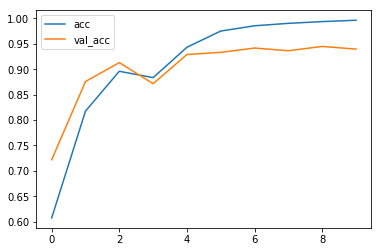

In [76]:
plt.plot(model.history.epoch, model.history.history.get('acc'), label='acc')
plt.plot(model.history.epoch, model.history.history.get('val_acc'), label='val_acc')
plt.legend()

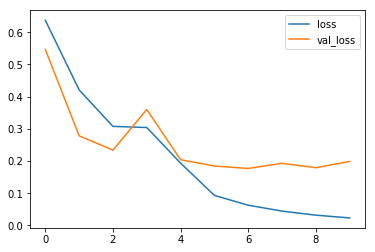

In [77]:
plt.plot(model.history.epoch, model.history.history.get('loss'), label='loss')
plt.plot(model.history.epoch, model.history.history.get('val_loss'), label='val_loss')
plt.legend()